<a href="https://colab.research.google.com/github/Geon0904/Geon0904/blob/main/Prediction_the_Boston_Housing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Boston's housing price

## Loading a dataset

In [ ]:
# Import necessary libraries for data analysis
import pandas as pd

# Set the file path:
file_path = '/content/drive/MyDrive/데이터분석/house_price.csv'

## I used the Boston housing dataset from Kaggle.

# Create Data Frames
df = pd.read_csv(file_path)

# Check the results
print(df)

'''
CRIM: Crime rate per capita
ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxides concentration
RM: Average number of rooms per dwelling
AGE: buildings built before 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property-tax rate per $10,000
PITRATIO: Pupil-teacher ratio by town
B: Black percentage
LSTAT: % lower status of the population
'''

     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio       b  lstat  medv 

## Data preprocessing:

### Removing unnecessary columns:

In [ ]:
### Removing unnecessary columns:
df.drop(columns=['Unnamed: 0'], inplace=True)
print(f'After removing irrelevant columns, check Dataframe: \n{df}')

After removing irrelevant columns, check Dataframe: 
        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0 

### Missing data treatment

In [ ]:
### Check the amount of null data per column
num_nulls = df.isnull().sum()
print(f'the amount of null data per column: \n{num_nulls}')

the amount of null data per column: 
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


### Outlier identification and mitigation

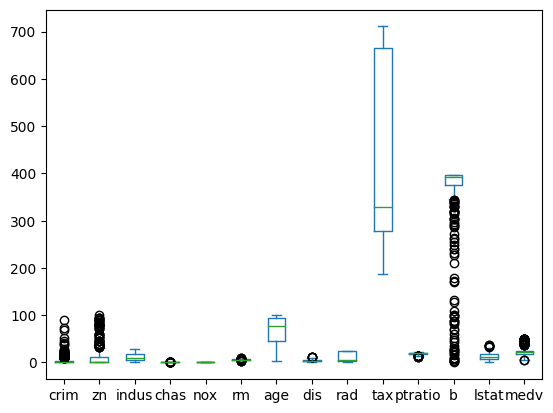

In [ ]:
### Visualizing the presence of outliers using box plots in data analysis

# Import necessary library
import matplotlib.pyplot as plt

# Visualize
df.plot(kind='box')
plt.show()

## EDA(Exploratory Data Analysis)

In [ ]:
### Import necessary library
import seaborn as sns

### Correlation analysis between housing price and crim

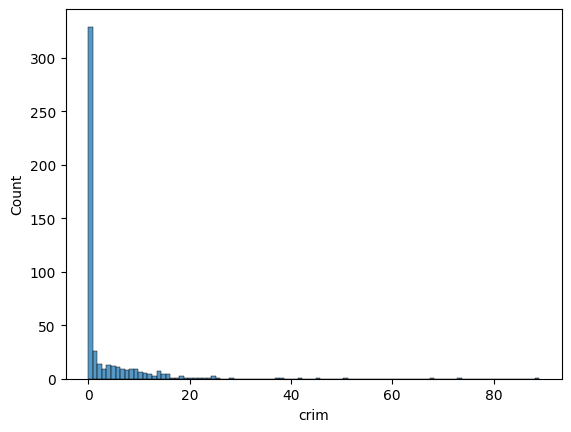

In [ ]:
### Visualizing the crime column
sns.histplot(data=df, x='crim')
plt.show()

In [ ]:
### Correlation analysis
df_corr = df.loc[:,['crim', 'medv']].corr()
print(f'Correlation coefficient between CRIM and MEDV: \n{df_corr}')

Correlation coefficient between CRIM and MEDV: 
          crim      medv
crim  1.000000 -0.388305
medv -0.388305  1.000000


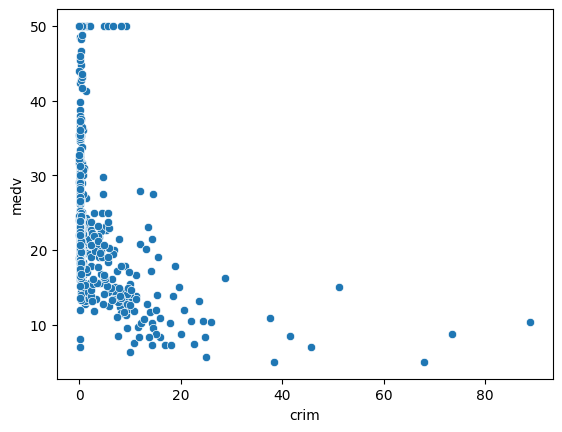

In [ ]:
### Visualizing the relationship between housing prices and crime rate:
sns.scatterplot(data=df, x='crim', y='medv')
plt.show()

### Correlation analysis between housing price and zn

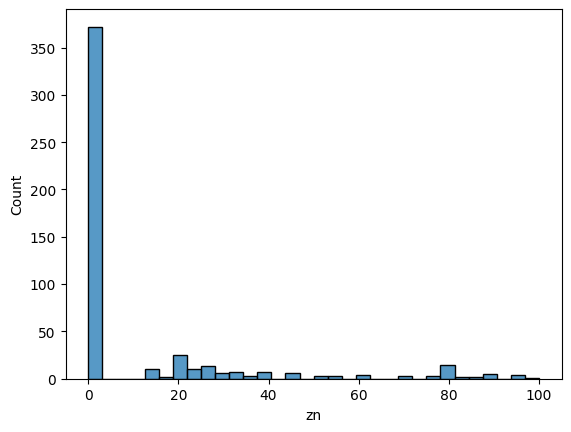

In [ ]:
### Visualizing the zn column
sns.histplot(data=df, x='zn')
plt.show()

In [ ]:
### Correlation analysis
df_corr = df.loc[:, ['zn', 'medv']].corr()
print(f'Correlation coefficient between zn and MEDV: \n{df_corr}')

Correlation coefficient between zn and MEDV: 
            zn      medv
zn    1.000000  0.360445
medv  0.360445  1.000000


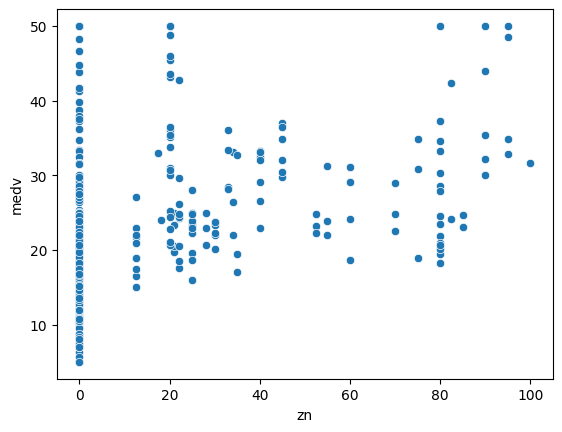

In [ ]:
### Visualizing the relationship between housing prices and zn:
sns.scatterplot(data=df, x='zn', y='medv')
plt.show()

### Correlation analysis between housing price and chas

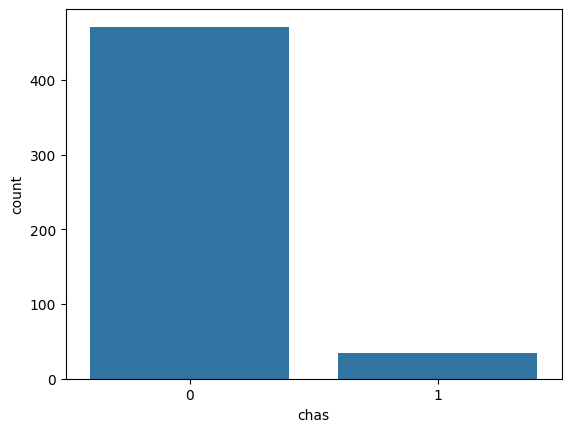

In [ ]:
### Visualizing the chas column
sns.countplot(data=df, x='chas')
plt.show()

In [ ]:
### Correlation analysis
df_corr = df.loc[:, ['chas', 'medv']].corr()
print(f'Correlation coefficient between chas and MEDV: \n{df_corr}')

Correlation coefficient between chas and MEDV: 
         chas     medv
chas  1.00000  0.17526
medv  0.17526  1.00000


### Correlation analysis between housing price and rm

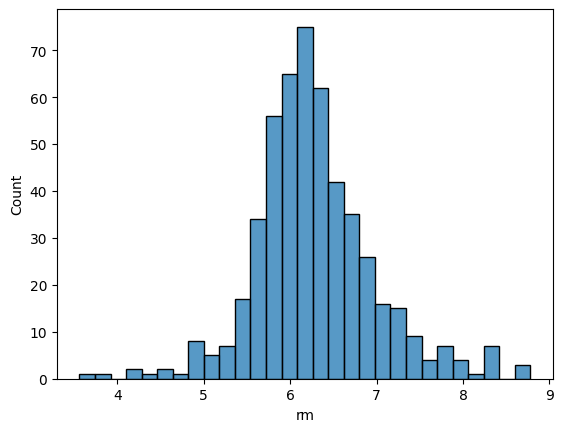

In [ ]:
### Visualizing the rm column
sns.histplot(data=df, x='rm')
plt.show()

In [ ]:
### Correlation analysis
df_corr = df.loc[:, ['rm', 'medv']].corr()
print(f'Correlation coefficient between rm and MEDV: \n{df_corr}')

Correlation coefficient between rm and MEDV: 
           rm     medv
rm    1.00000  0.69536
medv  0.69536  1.00000


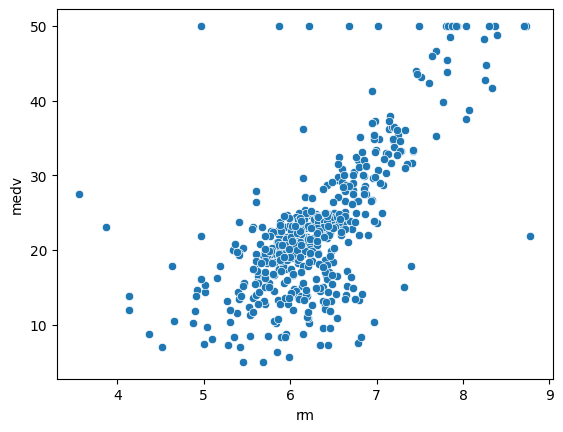

In [ ]:
### Visualizing the relationship between housing prices and rm column:
sns.scatterplot(data=df, x='rm', y='medv')
plt.show()

### Corelation analysis between housing price and dis

In [ ]:
### Summary statistics for the DIS column
print(df.loc[:, 'dis'].describe())

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: dis, dtype: float64


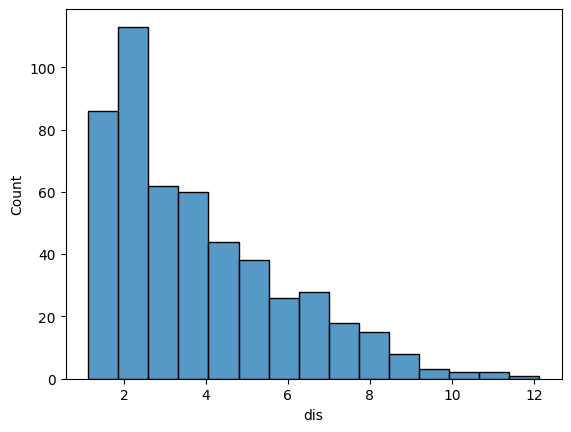

In [ ]:
### Visualizing the dis column
sns.histplot(data=df, x='dis')
plt.show()

In [ ]:
### Correlation analysis
df_corr = df.loc[:, ['dis', 'medv']].corr()
print(f'Correlation coefficient between dis and MEDV: \n{df_corr}')

Correlation coefficient between dis and MEDV: 
           dis      medv
dis   1.000000  0.249929
medv  0.249929  1.000000


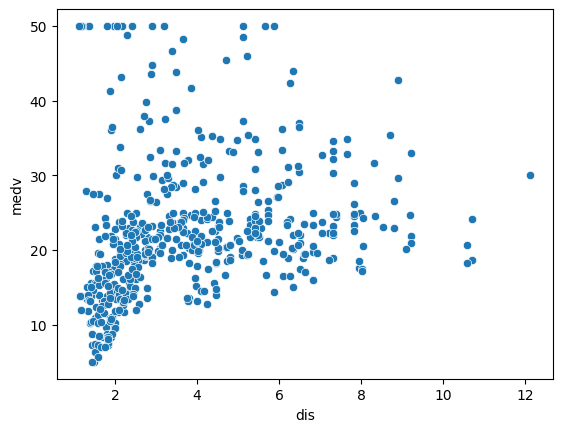

In [ ]:
### Visualizing the relationship between housing prices and dis column:
sns.scatterplot(data=df, x='dis', y='medv')
plt.show()

### Corelation analysis between housing price and tax

In [ ]:
### Summary statistics for the TAX column
print(df.loc[:, 'tax'].describe())

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64


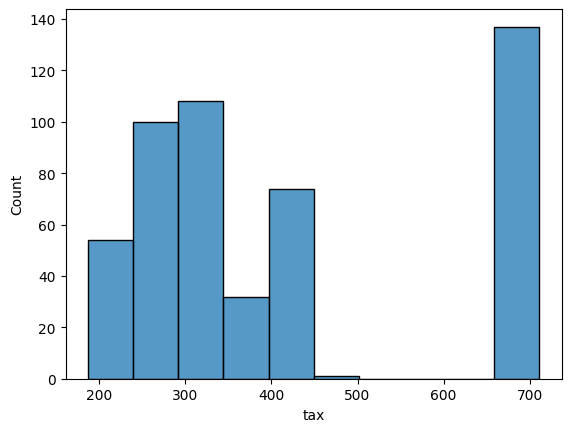

In [ ]:
### Visualizing the tax column
sns.histplot(data=df, x='tax')
plt.show()

In [ ]:
### Correlation analysis
df_corr = df.loc[:, ['tax', 'medv']].corr()
print(f'Correlation coefficient between tax and MEDV: \n{df_corr}')

Correlation coefficient between tax and MEDV: 
           tax      medv
tax   1.000000 -0.468536
medv -0.468536  1.000000


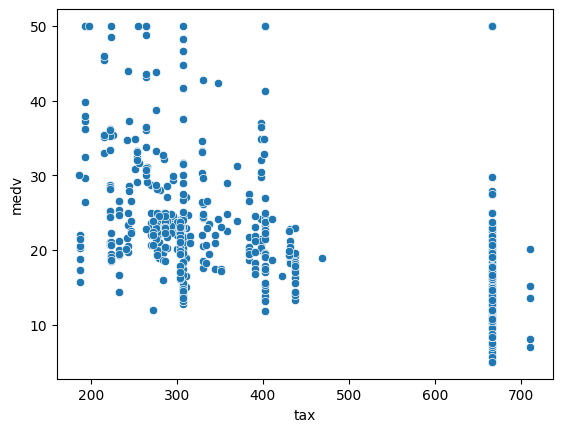

In [ ]:
### Visualizing the relationship between housing prices and tax column
sns.scatterplot(data=df, x='tax', y='medv')
plt.show()

### Corelation analysis between housing price and ptratio

In [ ]:
### Summary statistics for the ptratio column
print(df.loc[:, 'ptratio'].describe())

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64


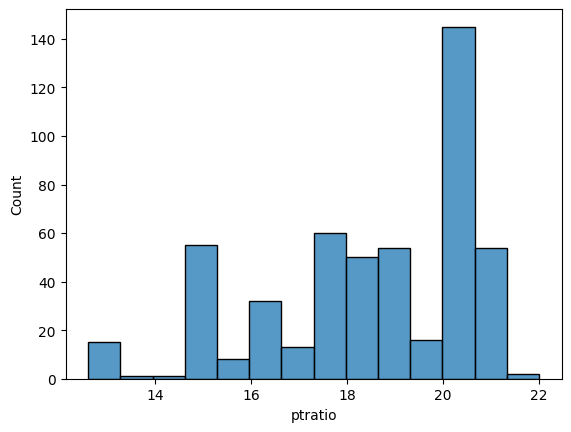

In [ ]:
### Visualizing the ptratio column
sns.histplot(data=df, x='ptratio')
plt.show()

In [ ]:
### Correlation analysis
df_corr = df.loc[:,['ptratio', 'medv']].corr()
print(f'Correlation coefficient between ptratio and MEDV: \n{df_corr}')

Correlation coefficient between ptratio and MEDV: 
          ptratio      medv
ptratio  1.000000 -0.507787
medv    -0.507787  1.000000


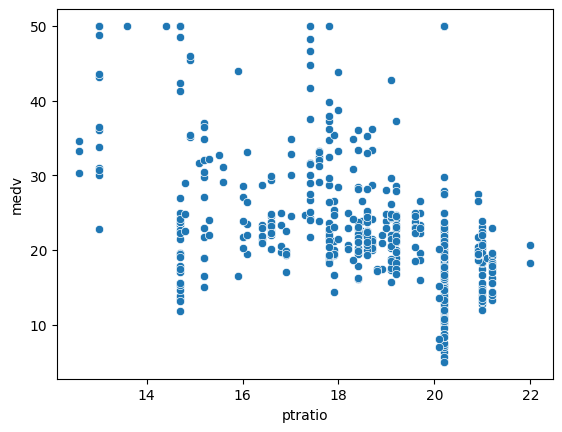

In [ ]:
### Visualizing the relationship between housing prices and ptratio column
sns.scatterplot(data=df, x='ptratio', y='medv')
plt.show()

### Corelation analysis between housing price and lstat

In [ ]:
### Summary statistics for the lstat column
print(df.loc[:, 'lstat'].describe())

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64


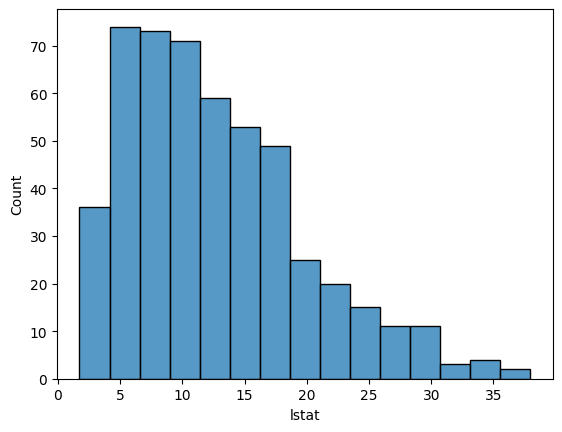

In [ ]:
### Visualizing the lstat column
sns.histplot(data=df, x='lstat')
plt.show()

In [ ]:
### Correlation analysis
df_corr = df.loc[:, ['lstat', 'medv']].corr()
print(f'Correlation coefficient between lstat and MEDV: \n{df_corr}')

Correlation coefficient between lstat and MEDV: 
          lstat      medv
lstat  1.000000 -0.737663
medv  -0.737663  1.000000


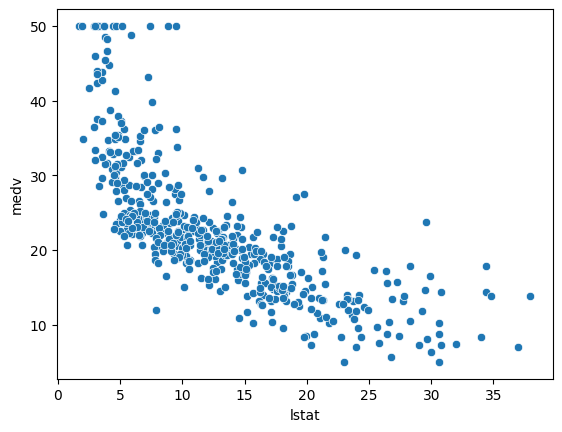

In [ ]:
### Visualizing the relationship between housing prices and lstat column
sns.scatterplot(data=df, x='lstat', y='medv')
plt.show()

## tree-based regression modeling

### Creating training and test datasets:

In [ ]:
### 75:25 ratio for creating training and test(evaluation) datasets

# Import necessary library
from sklearn.model_selection import train_test_split

# Create the x_data
X_data = df.drop(columns=['medv'])
print(f'Check the X_data : \n{X_data}')

print('-'*80)

# Create the y_data
y_data = df.loc[:, 'medv']
print(f'Check the y_data : \n{y_data}')

print('-'*80)

# Calling a function train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.25,
                                                    random_state=0)

Check the X_data : 
        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8 

In [ ]:
### Check the index of training data

# Check the index of X_train
print(X_train.index)

print('-'*80)

# Check the index of y_train
print(y_train.index)

Index([245,  59, 276, 395, 416, 491, 170, 419,  55, 235,
       ...
       211,   9, 359, 195, 251, 323, 192, 117,  47, 172],
      dtype='int64', length=379)
--------------------------------------------------------------------------------
Index([245,  59, 276, 395, 416, 491, 170, 419,  55, 235,
       ...
       211,   9, 359, 195, 251, 323, 192, 117,  47, 172],
      dtype='int64', length=379)


### Predicting House Prices Using Decision Tree Regression

#### Creating the best model

In [ ]:
### Model Optimization

# Import necessary library
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Creating a Baseline Model for Optimization
base_dt = DecisionTreeRegressor(random_state=0)

# Setting the parameters to optimize and search conditions
depth = np.arange(3,11)
params = {'max_depth':depth}

# Creating Models for Cross-Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Creating Exploratory Models
grid_dt = GridSearchCV(
    estimator=base_dt,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=kfold
)

# Training and Evaluating Exploratory Models
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='neg_mean_squared_error')

In [ ]:
### Tuning hyperparameters
print(grid_dt.best_params_)

{'max_depth': 7}


In [ ]:
### Creating the best model
best_dt = DecisionTreeRegressor(max_depth=7, random_state=0)

#### Training the best model

In [ ]:
best_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=0)

#### Predictions on a test set

In [ ]:
pred_test = best_dt.predict(X_test)

#### Evaluation the best model

In [ ]:
# Import necessary library
from sklearn.metrics import mean_squared_error as mse

# Measuring performance on a test set
mse_test = mse(y_test, pred_test)

# Check the result
print(f'performance on a test set : {mse_test}')

performance on a test set : 29.388889335175342


In [ ]:
### Measuring RMSE
rmse = np.sqrt(mse_test)
print(f'rmse of a test set: {rmse}')

rmse of a test set: 5.421152030258453


In [ ]:
print(y_test.describe())

count    127.000000
mean      22.306299
std        9.074548
min        5.600000
25%       17.150000
50%       21.000000
75%       24.300000
max       50.000000
Name: medv, dtype: float64


### Predicting House Prices Using Random Forest Regression

#### Creating the best model

In [ ]:
# Import necessary library
from sklearn.ensemble import RandomForestRegressor

# Creating a Baseline Model for Optimization
base_rf = RandomForestRegressor(random_state=0)

# Setting the parameters to optimize and search conditions
depth = np.arange(3,11)
params = {'n_estimators':[100,200,300,400,500],
          'max_depth':depth}

# Creating Models for Cross-Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Creating Exploratory Models
grid_rf = GridSearchCV(
    estimator=base_rf,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=kfold
)

# Training and Evaluating Exploratory Models
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
### Tuning hyperparameters
print(grid_rf.best_params_)

{'max_depth': 10, 'n_estimators': 400}


In [ ]:
### Creating the best model
best_rf = RandomForestRegressor(n_estimators=400, max_depth=10, random_state=0)

#### Training the best model

In [ ]:
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=400, random_state=0)

#### Predictions on a test set

In [ ]:
pred_test = best_rf.predict(X_test)

#### Evaluation the best model

In [ ]:
# Measuring performance on a test set
mse_test = mse(y_test, pred_test)

# Check the result
print(f'mse on a test set : {mse_test}')

mse on a test set : 16.41217686428153


In [ ]:
### Measuring RMSE
rmse = np.sqrt(mse_test)
print(f'rmse on a test set: {rmse}')

rmse on a test set: 4.051194498451232


In [ ]:
print(y_test.describe())

count    127.000000
mean      22.306299
std        9.074548
min        5.600000
25%       17.150000
50%       21.000000
75%       24.300000
max       50.000000
Name: medv, dtype: float64


### Predicting House Prices Using LightGBM Regression

#### Creating the best model

In [ ]:
# Import necessary library
from lightgbm import LGBMRegressor

# Creating a Baseline Model for Optimization
base_lgbm  = LGBMRegressor(random_state=0,
                           bagging_seed=0,
                           feature_fraction_seed=0,
                           data_random_seed=0,
                           drop_seed=0,
                           verbose=-1)

# Setting the parameters to optimize and search conditions
depth=np.arange(3,11)
params = {'n_estimators':[50, 100, 200, 300, 400, 500],
          'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.5],
          'max_depth':depth}

# Creating Models for Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Creating Exploratory Models
grid_lgbm = GridSearchCV(
    estimator=base_lgbm,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=kfold
)

# Training and Evaluating Exploratory Models
grid_lgbm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LGBMRegressor(bagging_seed=0, data_random_seed=0,
                                     drop_seed=0, feature_fraction_seed=0,
                                     random_state=0, verbose=-1),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
### Creating the best model
best_lgbm = LGBMRegressor(random_state=0,
                           bagging_seed=0,
                           feature_fraction_seed=0,
                           data_random_seed=0,
                           drop_seed=0,
                           verbose=-1,
                          learning_rate=0.1,
                          max_depth=4,
                          n_estimators=500)

#### Training the best model

In [ ]:
best_lgbm.fit(X_train,y_train)

LGBMRegressor(bagging_seed=0, data_random_seed=0, drop_seed=0,
              feature_fraction_seed=0, max_depth=4, n_estimators=500,
              random_state=0, verbose=-1)

#### Predictions on a test set

In [ ]:
pred_test = best_lgbm.predict(X_test)

#### Evaluating the best model

In [ ]:
# Measuring performance on a test set
mse_test = mse(y_test, pred_test)

# Check the result
print(f'mse on a test set : {mse_test}')

mse on a test set : 18.51494233245623


In [ ]:
### Measuring the rmse
rmse = np.sqrt(mse_test)
print(f'rmse on a test set : {rmse}')

rmse on a test set : 4.3028992937850905


### Predicting House Prices Using XGBoost Regression

#### Creating the best model

In [ ]:
# Import necessary library
from xgboost import XGBRegressor

# Creating a Baseline Model for Optimization
base_xgb = XGBRegressor(random_state=0)

# Setting the parameters to optimize and search conditions
#depth = np.arange(3,11)
params = {'n_estimators':[100, 200, 300, 400, 500],
          'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
          'max_depth':[3, 4, 5, 6, 7]}

# Creating Models for Cross-Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Creating Exploratory Models
grid_xgb = GridSearchCV(
    estimator=base_xgb,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=kfold
)

# Training and Evaluating Exploratory Models
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
### Finding the Optimal Hyperparameter Combination
print(grid_xgb.best_params_)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}


In [ ]:
### Creating the best model
best_xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.5,
    max_depth=3,
    random_state=0
)

#### Training the best model

In [ ]:
best_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

#### Predictions on a test set

In [ ]:
pred_test = best_xgb.predict(X_test)

#### Evaluating the best model

In [ ]:
# Measuring performance on a test set
mse_test = mse(y_test, pred_test)

# Check the result
print(f'mse on a test set : {mse_test}')

mse on a test set : 24.90862410161189


In [ ]:
### RMSE 측정
rmse = np.sqrt(mse_test)
print(f'rmse on a test set : {rmse}')

rmse on a test set : 4.990854045312474


In [ ]:
print(y_test.describe())

count    127.000000
mean      22.306299
std        9.074548
min        5.600000
25%       17.150000
50%       21.000000
75%       24.300000
max       50.000000
Name: medv, dtype: float64


In [ ]:
print(X_data.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## Predicting House Prices Using MinMaxScaler

### Data Transformation with MinMaxScaler

In [ ]:
### Splitting Data into X_data and y_data

# Crating the X_data
df.drop(columns=['chas', 'medv'])
print(f'X_data : {X_data}')

print('-'*80)

# Creating the y_data
y_data = df.loc[:, 'medv']
print(f'y_data : {y_data}')

X_data :         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4

In [ ]:
### Creating Training and Testing Datasets

# Import necessary function
from sklearn.model_selection import train_test_split

# Function Calls
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.25,
                                                    random_state=0)

In [ ]:
### Applying MinMaxScaler

# Import necessary function
from sklearn.preprocessing import MinMaxScaler

# Function Calls and Model Creation
scaler = MinMaxScaler()

# Scaling Training Data
X_train_scaled = scaler.fit_transform(X_train)
print(f'Check the X_train after scaling: \n{X_train_scaled}')

print('-'*80)

# Scaling Test Data
X_test_scaled = scaler.fit_transform(X_test)
print(f'Check the X_test after scaling: \n{X_test_scaled}')

Check the X_train after scaling: 
[[0.00207947 0.22       0.19794721 ... 0.69148936 0.98040748 0.47460993]
 [0.00108981 0.25       0.17118768 ... 0.75531915 1.         0.21248227]
 [0.00110566 0.4        0.2181085  ... 0.53191489 0.98071007 0.12255319]
 ...
 [0.00162594 0.         0.35007331 ... 0.55319149 0.99397347 0.24312057]
 [0.0025059  0.         0.23643695 ... 0.56382979 0.98951031 0.48425532]
 [0.00149286 0.         0.13159824 ... 0.42553191 1.         0.36765957]]
--------------------------------------------------------------------------------
Check the X_test after scaling: 
[[7.29592427e-04 0.00000000e+00 1.00361301e-01 ... 5.00000000e-01
  9.44991124e-01 1.50346741e-01]
 [1.25389517e-01 0.00000000e+00 6.96908872e-01 ... 8.83720930e-01
  9.22013695e-01 2.11095700e-01]
 [1.36900592e-03 0.00000000e+00 5.27900442e-01 ... 4.41860465e-01
  9.91985798e-01 2.38002774e-01]
 ...
 [4.56743357e-03 0.00000000e+00 3.67723806e-01 ... 6.74418605e-01
  9.98326148e-01 2.23300971e-01]
 [1.154

### Predicting House Prices Using Decision Tree Regression

#### Creating the best model

In [ ]:
### Model Optimization)

# Import necessary library
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Creating a Baseline Model for Optimization
base_dt = DecisionTreeRegressor(random_state=0)

# Setting the parameters to optimize and search conditions
depth = np.arange(3,11)
params = {'max_depth':depth}

# Creating Models for Cross-Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Creating Exploratory Models
grid_dt = GridSearchCV(
    estimator=base_dt,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=kfold
)

# Training and Evaluating Exploratory Models
grid_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='neg_mean_squared_error')

In [ ]:
### Finding the Optimal Hyperparameter Combination
print(grid_dt.best_params_)

{'max_depth': 7}


In [ ]:
### creating the best model
best_dt = DecisionTreeRegressor(max_depth=7, random_state=0)

#### Training the best model

In [ ]:
best_dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=7, random_state=0)

#### Predictions on a test set

In [ ]:
pred_test_scaled = best_rf.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### Evaluating the best model

In [ ]:
# Measuring performance on a test set
mse_test_scaled = mse(y_test, pred_test_scaled)

# Check the result
print(f'mse on a test set: {mse_test_scaled}')

mse on a test set: 329.839392495919


### Predicting House Prices Using LightGBM Regression

#### Creating the best model

In [ ]:
# Import necessary library
from lightgbm import LGBMRegressor

# Creating a Baseline Model for Optimization
base_lgbm  = LGBMRegressor(random_state=0,
                           bagging_seed=0,
                           feature_fraction_seed=0,
                           data_random_seed=0,
                           drop_seed=0,
                           verbose=-1)

# Setting the parameters to optimize and search conditions
depth=np.arange(3,11)
params = {'n_estimators':[50, 100, 200, 300, 400, 500],
          'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.5],
          'max_depth':depth}

# Creating Models for Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Creating Exploratory Models
grid_lgbm = GridSearchCV(
    estimator=base_lgbm,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=kfold
)

# Training and Evaluating Exploratory Models
grid_lgbm.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LGBMRegressor(bagging_seed=0, data_random_seed=0,
                                     drop_seed=0, feature_fraction_seed=0,
                                     random_state=0, verbose=-1),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
### Finding the Optimal Hyperparameter Combination
print(grid_lgbm.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}


In [ ]:
### Creating the best model
best_lgbm  = LGBMRegressor(random_state=0,
                           bagging_seed=0,
                           feature_fraction_seed=0,
                           data_random_seed=0,
                           drop_seed=0,
                           verbose=-1,
                           learning_rate=0.1,
                           max_depth=4,
                           n_estimators=500)

#### Training the best model

In [ ]:
best_lgbm.fit(X_train_scaled, y_train)

LGBMRegressor(bagging_seed=0, data_random_seed=0, drop_seed=0,
              feature_fraction_seed=0, max_depth=4, n_estimators=500,
              random_state=0, verbose=-1)

#### Predictions on a test set

In [ ]:
pred_test_scaled = best_lgbm.predict(X_test_scaled)

#### Evaluating the best model

In [ ]:
# Measuring performance on a test set
mse_test_scaled = mse(y_test, pred_test_scaled)

# Check the result
print(f'mse on a test set: {mse_test_scaled}')

mse on a test set: 17.007547413813338


In [ ]:
### Measuring RMSE

# Import necessary library
import numpy as np

# Measure the rmse
rmse_scaled = np.sqrt(mse_test_scaled)

# Check the result
print(f'rmse on a test set: {rmse_scaled}')

rmse on a test set: 4.124020782417729


### Predicting House Prices Using XGBoost Regression

#### Creating the best model

In [ ]:
# Import necessary function
from xgboost import XGBRegressor

# Creating a Baseline Model for Optimization
base_xgb = XGBRegressor(random_state=0)

# Setting the parameters to optimize and search conditions
# depth=np.arange(3,11)
params = {'n_estimators':[100, 200, 300, 400, 500],
          'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.5],
          'max_depth':[3, 4, 5, 6, 7]}

# Creating Models for Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Creating Exploratory Models
grid_xgb = GridSearchCV(
    estimator=base_xgb,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=kfold
)

# Training and Evaluating Exploratory Models
grid_xgb.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
### Finding the Optimal Hyperparameter Combination
print(grid_xgb.best_params_)

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
### Create the best model
best_xgb = XGBRegressor(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=0)

#### Training the best model

In [ ]:
best_xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

#### Predictions on a test set

In [ ]:
pred_test_scaled = best_xgb.predict(X_test_scaled)

#### Evaluating the best model

In [ ]:
# Measuring performance on a test set
mse_test_scaled = mse(y_test, pred_test_scaled)

# check the result
print(f'mse on a test set: {mse_test_scaled}')

mse on a test set: 17.25716127067007
